<a href="https://colab.research.google.com/github/iruampr/DataAnalysis/blob/main/Cars_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#from google.colab import drive
#drive.mount('/content/drive')

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('/content/drive/MyDrive/xpe/cars.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [30]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [31]:
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')

In [32]:
df['mpg'] = df['mpg'].fillna(df['mpg'].mean())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mean())
df['cubicinches'] = df['cubicinches'].fillna(df['cubicinches'].mean())
df['hp'] = df['hp'].fillna(df['hp'].mean())
df['weightlbs'] = df['weightlbs'].fillna(df['weightlbs'].mean())
df['time-to-60'] = df['time-to-60'].fillna(df['time-to-60'].mean())
df['year'] = df['year'].fillna(df['year'].mean())

In [33]:
df[(df.applymap(lambda x: pd.isnull(x) or x == " ")).any(axis=1)]

<ipython-input-33-b6561d193662>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[(df.applymap(lambda x: pd.isnull(x) or x == " ")).any(axis=1)]


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand


In [34]:
df['weightlbs'].mean()

3009.8333333333335

In [35]:
selected_features_km = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

In [36]:
df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]["mpg"].median()

22.0

In [37]:
df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]["time-to-60"].describe()

,time-to-60
count,261.000000
mean,15.547893
std,2.910625
min,8.000000
25%,14.000000
50%,16.000000
75%,17.000000
max,25.000000


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

x = StandardScaler().fit_transform(selected_features_km)

In [39]:
pca = PCA(n_components=3)
mainComps = pca.fit_transform(x)
pcaDf = pd.DataFrame(data = mainComps, columns=[f'PC{i+1}' for i in range(3)])

In [40]:
pcaDf.head()

,PC1,PC2,PC3
0,3.485219,-0.526326,-0.139738
1,-2.176912,0.285424,-1.304613
2,2.684973,-1.046946,-0.732156
3,3.534648,-0.847619,-0.801334
4,-2.299222,-0.194808,-0.221704


In [41]:
pca.explained_variance_ratio_[0] * 100

72.37134885896343

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Define o número de clusters como 3
kmeans = kmeans.fit(pcaDf)  # Treina o modelo K-means com os três primeiros componentes principais
labels = kmeans.labels_  # Obtém os rótulos dos clusters atribuídos a cada ponto de dados

In [43]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

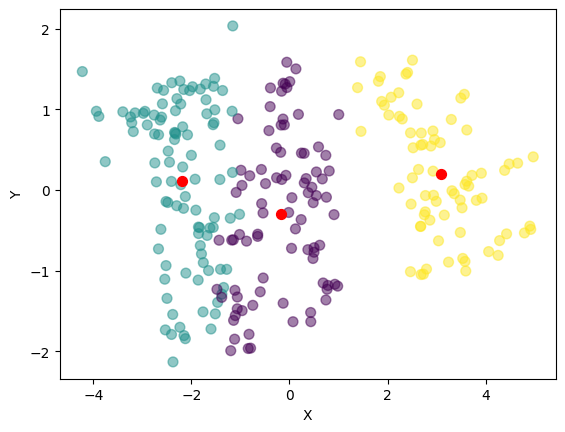

In [44]:
#realiza o plot do gráfico da saída
plt.scatter(pcaDf['PC1'], pcaDf['PC2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")

# Arvore de Decisao

In [45]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [46]:
df['efic'] = df['mpg'].apply(lambda x: True if x > 25 else False)

Acurácia do modelo: 0.8734177215189873


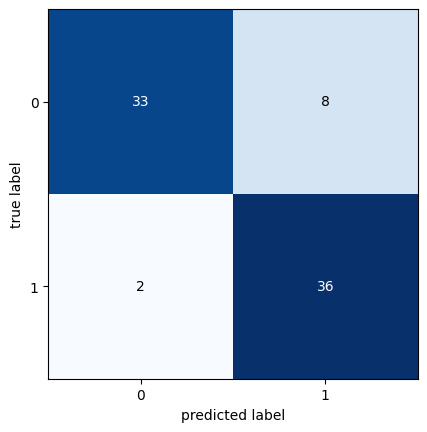

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

selected_features_dt = df[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]
x = StandardScaler().fit_transform(selected_features_dt)
y = df['efic']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

clf_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
clf_df.head()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

# Regressao Logistica

Acurácia do modelo: 0.8607594936708861


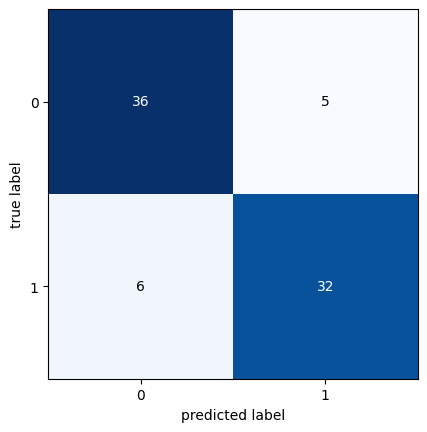

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

selected_features_dt = df[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]
x = StandardScaler().fit_transform(selected_features_dt)
#y = df['mpg']
y = df['efic']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

log_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
log_df.head()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

selected_features2 = df[['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]
x = StandardScaler().fit_transform(selected_features2)
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Criar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(x_train, y_train)

# Prever o valor de 'mpg' para cada linha do DataFrame
test_df = pd.DataFrame(x_test, columns=['cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60'])
test_df['mpg_pred'] = model.predict(x_test)
test_df["mpg_true"] = y_test

# Classificar a eficiência com base no valor previsto de 'mpg'
test_df['efic_pred'] = df['mpg_predito'].apply(lambda x: 'Eficiente' if x > 25 else 'Ineficiente')